# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "units=Metric&APPID=" + weather_api_key + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xinxiang


Processing Record 2 of Set 1 | aral
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | mandera
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | marsabit
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | newman
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | lazaro cardenas
Processing Record 12 of Set 1 | santiago de cao
Processing Record 13 of Set 1 | betheny
Processing Record 14 of Set 1 | argo
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | bad konig
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | whangarei
Processing Record 19 of Set 1 | palikir - national government center
Processing Record 20 of Set 1 | moroto
Processing Record 21 of Set 1 | lao cai
Processing Record 22 of Set 1 | waitangi
Processing Record 23 of Set 1 | kapa'a
Processing Record 24 of Set 1 | badger
Processing Record 25 of Set 1 | ti

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xinxiang,35.3089,113.8672,9.31,34,84,3.01,CN,1709947836
1,aral,40.5156,81.2636,5.83,35,0,2.57,CN,1709947837
2,papatowai,-46.5619,169.4708,13.00,51,95,5.56,NZ,1709947837
3,mandera,3.9366,41.8670,27.73,63,2,5.20,KE,1709947843
4,puerto natales,-51.7236,-72.4875,6.66,77,97,5.13,CL,1709947845


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xinxiang,35.3089,113.8672,9.31,34,84,3.01,CN,1709947836
1,aral,40.5156,81.2636,5.83,35,0,2.57,CN,1709947837
2,papatowai,-46.5619,169.4708,13.00,51,95,5.56,NZ,1709947837
3,mandera,3.9366,41.8670,27.73,63,2,5.20,KE,1709947843
4,puerto natales,-51.7236,-72.4875,6.66,77,97,5.13,CL,1709947845


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

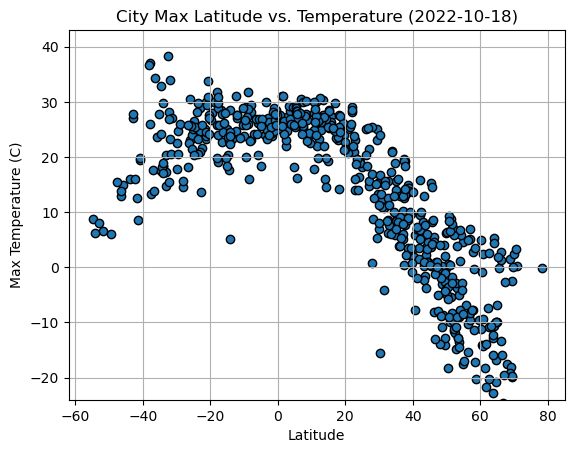

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.ylim(-24,43)
plt.xlim(-62,85)
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

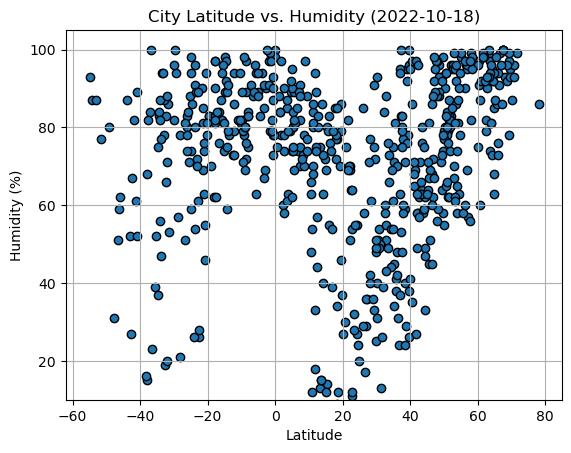

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.ylim(10,105)
plt.xlim(-62,85)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

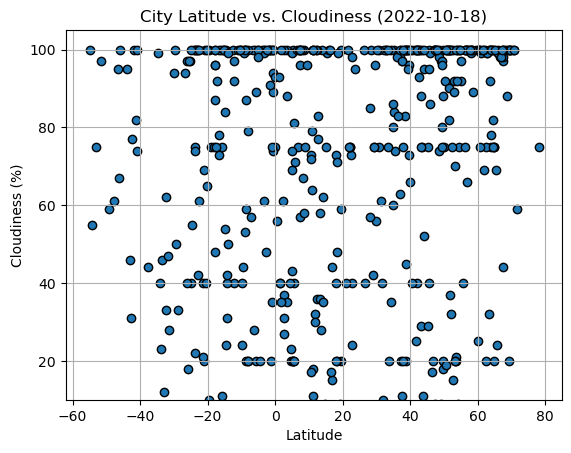

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.ylim(10,105)
plt.xlim(-62,85)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

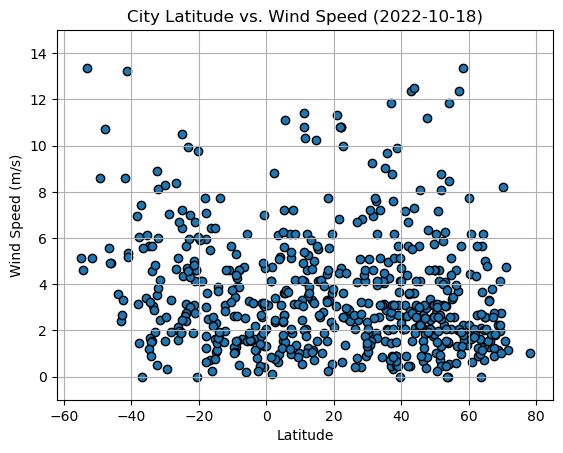

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.ylim(-1,15)
plt.xlim(-62,85)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, xlabel, ylabel, xyvalue):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=xyvalue, fontsize=12, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Linear Regression Plots')
    print(f"The r-value is: {rvalue}")

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xinxiang,35.3089,113.8672,9.31,34,84,3.01,CN,1709947836
1,aral,40.5156,81.2636,5.83,35,0,2.57,CN,1709947837
3,mandera,3.9366,41.8670,27.73,63,2,5.20,KE,1709947843
5,marsabit,2.3284,37.9899,22.08,60,61,8.82,KE,1709947845
7,talnakh,69.4865,88.3972,-19.89,95,100,2.74,RU,1709947845


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,13.00,51,95,5.56,NZ,1709947837
4,puerto natales,-51.7236,-72.4875,6.66,77,97,5.13,CL,1709947845
6,grytviken,-54.2811,-36.5092,6.22,87,55,4.61,GS,1709947845
11,santiago de cao,-7.9589,-79.2392,23.07,83,20,4.63,PE,1709947845
14,west island,-12.1568,96.8225,26.99,94,40,3.09,CC,1709947846


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8851528720382512


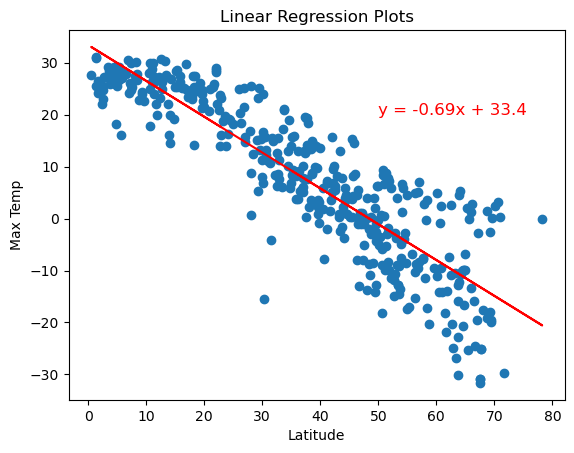

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
lin_reg(x_values, y_values, 'Latitude', 'Max Temp', (50, 20))

The r-value is: 0.45722295432856463


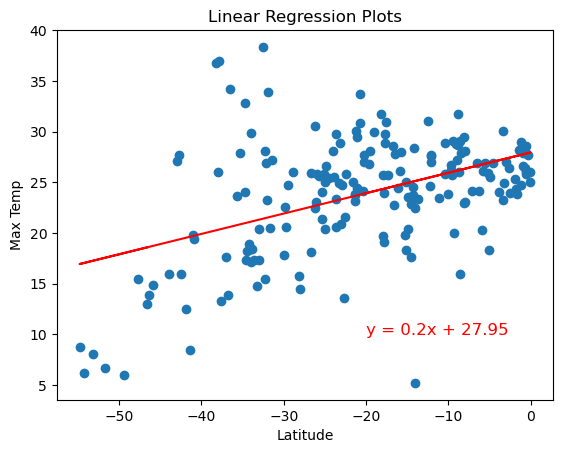

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
lin_reg(x_values, y_values, 'Latitude', 'Max Temp', (-20, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34349939945197855


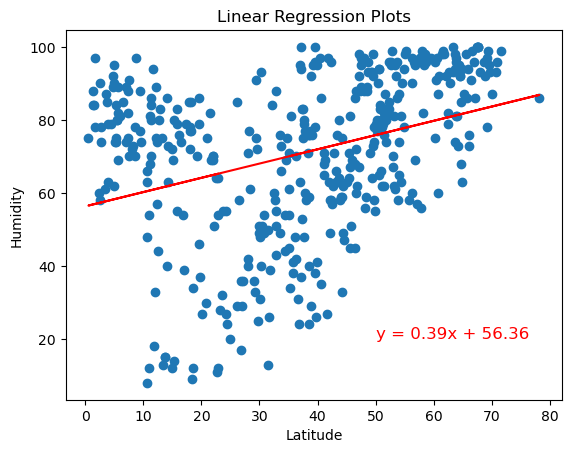

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
lin_reg(x_values, y_values, 'Latitude', 'Humidity', (50, 20))

The r-value is: 0.37814210576937324


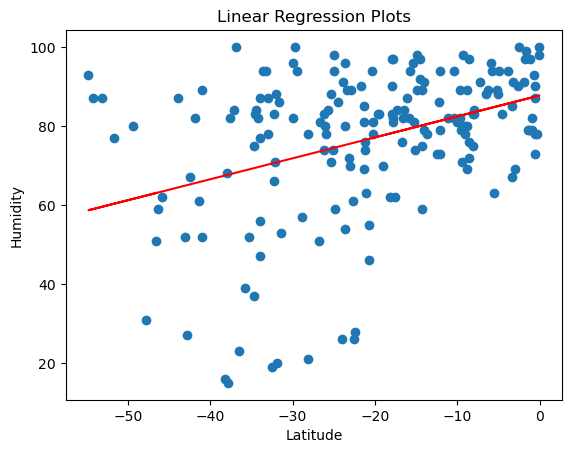

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
lin_reg(x_values, y_values, 'Latitude', 'Humidity', (-20, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25410484520461063


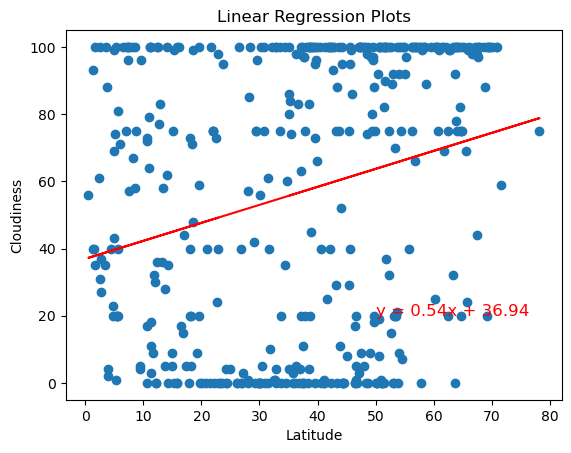

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
lin_reg(x_values, y_values, 'Latitude', 'Cloudiness', (50, 20))

The r-value is: 0.2863117547889034


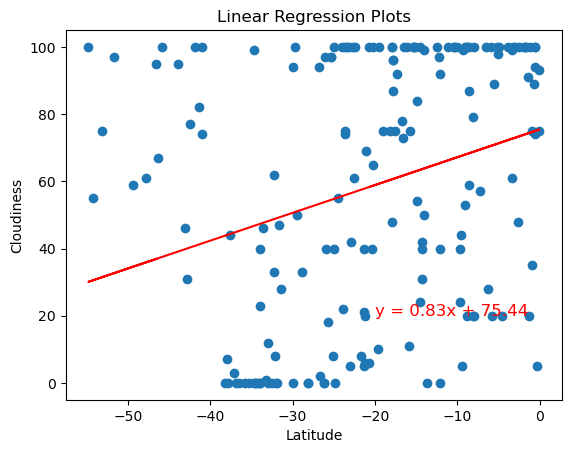

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
lin_reg(x_values, y_values, 'Latitude', 'Cloudiness', (-20, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12406521059354314


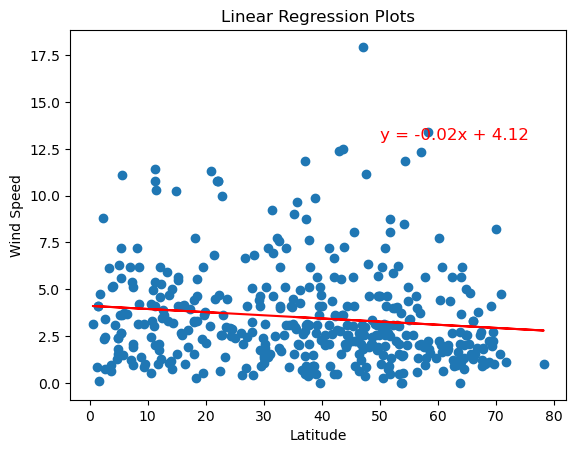

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
lin_reg(x_values, y_values, 'Latitude', 'Wind Speed', (50, 13))

The r-value is: -0.39244050997118013


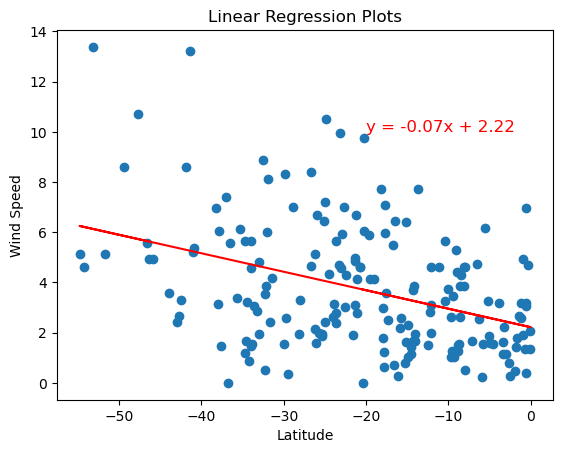

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
lin_reg(x_values, y_values, 'Latitude', 'Wind Speed', (-20, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE